This project aims to create a data lake solution to analyze the trend in human development indicators in Saint Kitts and Nevis over time. The data lake will be built using the data from https://data.world/hdro/663862f6-ca08-4957-8b5e-51471cedd04f/workspace/file?filename=human-development-indicators-for-saint-kitts-and-nevis-1.csv

The Analysis Question being looked at is : What humam factors contribute the most to human development in Saint Kitts and Nevis and how have they changed over time?

Data Wrangling For Data prepration and exploration, the following packages will be useful:

Pandas: For loading, cleaning, and manipulating data.

Numpy: For mathematical and scientific computing.

Scipy : For statistical analysis, optimization, and signal processing.

Stats Model : For linear regression, generalized linear models, and time series analysis. You can use 

Matplotlib : for creating graphs, charts, and plots

Import Packages

In [284]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

Import Dataset Human development indicators for Saint Kitts and Nevis

In [285]:
HumInd = pd.read_csv("C:/Users/admin/Desktop/Entity/Final Project/Datasets/human-development-indicators-for-saint-kitts-and-nevis.csv")

Take a look at the data to observe the structure and get familiar with the contents. 

The `.head()` method is a function that is used to display the first few rows of a data frame or a series. Specifically, .head() returns a new data frame or series that includes the first n rows of the original data, where n is a parameter that you can specify. By default, .head() shows the first 5 rows of the data.

In [286]:
HumInd.head()

,#country+code,#country+name,#indicator+code,#indicator+name,#indicator+value+num,#date+year
0,KNA,Saint Kitts and Nevis,21806,Refugees by country of origin (thousands),0.050000,2017
1,KNA,Saint Kitts and Nevis,31706,Share of seats in parliament (% held by women),13.333333,2017
2,KNA,Saint Kitts and Nevis,44206,Total population (millions),0.055345,2017
3,KNA,Saint Kitts and Nevis,45106,Urban population (%),30.800000,2017
4,KNA,Saint Kitts and Nevis,52606,"Remittances, inflows (% of GDP)",1.124040,2017


The `.shape` attribute is used to show the dimensions of a data frame or a numpy array. Specifically, .shape returns a tuple that contains the number of rows and the number of columns of the data frame or array.

In [287]:
HumInd.shape

(538, 6)

the `.info()` method is used to show the concise summary of a data frame or a series, including the column names, the data types, and the number of non-null values. Specifically, .info() displays the following information for each column:

The column name
The number of non-null values in the column
The data type of the column
The amount of memory used by the column

In [288]:
HumInd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #country+code         538 non-null    object 
 1   #country+name         538 non-null    object 
 2   #indicator+code       538 non-null    int64  
 3   #indicator+name       538 non-null    object 
 4   #indicator+value+num  538 non-null    float64
 5   #date+year            538 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 25.3+ KB


Double check the data was correctly uploaded as a dataframe

In [289]:
print(type(HumInd))

<class 'pandas.core.frame.DataFrame'>


It has been upoloaded as a data frame. Great!

Create a function using the 'def' keyword. The function retruns the dataframe when called. The fucntion can be pulled multiple times to retrieve information in the dataframe.

In [290]:
def HumInd_function():
    return HumInd

Call the function

In [291]:
result = HumInd_function()

Print the results to make sure that the code was succesful

In [292]:
print(result)

    #country+code          #country+name  #indicator+code  \
0             KNA  Saint Kitts and Nevis            21806   
1             KNA  Saint Kitts and Nevis            31706   
2             KNA  Saint Kitts and Nevis            44206   
3             KNA  Saint Kitts and Nevis            45106   
4             KNA  Saint Kitts and Nevis            52606   
5             KNA  Saint Kitts and Nevis            64306   
6             KNA  Saint Kitts and Nevis            64406   
7             KNA  Saint Kitts and Nevis            69206   
8             KNA  Saint Kitts and Nevis            69706   
9             KNA  Saint Kitts and Nevis           103006   
10            KNA  Saint Kitts and Nevis           103206   
11            KNA  Saint Kitts and Nevis           103606   
12            KNA  Saint Kitts and Nevis           103706   
13            KNA  Saint Kitts and Nevis           123306   
14            KNA  Saint Kitts and Nevis           123406   
15            KNA  Saint

The `.value_counts()` method is used to display the frequency of unique values in a pandas series or data frame column. Specifically, .value_counts() returns a new series that contains the count of each unique value in the original series or column, in descending order of frequency.

In [293]:
HumInd["#indicator+name"].value_counts()

Gross national income (GNI) per capita (2011 PPP $)                         28
Life expectancy at birth (years)                                            28
Expected years of schooling (years)                                         28
Life expectancy index                                                       28
Income index                                                                28
Education index                                                             13
Human Development Index (HDI)                                               13
Mean years of schooling (years)                                             13
Expected years of schooling, female (years)                                 12
Share of seats in parliament (% held by women)                              12
Gross domestic product (GDP), total (2011 PPP $ billions)                   12
Domestic credit provided by financial sector (% of GDP)                     12
Expected years of schooling, male (years)           

In [294]:
HumInd["#date+year"].value_counts()

2005    44
2010    43
2012    42
2000    42
2014    41
2011    41
2013    40
2015    37
2016    32
1990    31
1995    30
2017    22
2006     8
2007     8
2008     8
2009     8
1997     6
2004     5
2002     5
2001     5
1999     5
1998     5
1996     5
1994     5
1993     5
1992     5
1991     5
2003     5
Name: #date+year, dtype: int64

not every year were all idnicators tested so it is difficult to compare each arae. the top five had teh same number whichmade it best for comparison. 

For the purpose of this project the top 3 will be used. 

Check for Missing Values

The 'isna' method is used to check for missing values in the dataframe. The result is a datframe with the same shape as the original data frame, where each element is 'True' if the corresponding value in the original dataframe is missing, and 'False' otherwise.

the 'sum' method is then used to count the number of missing values in each column. The result is a series with the number of missing values for each column.

Call the function to retrieve the data frame

Use the isna method to create a boolean mask that indicates which values are missing:

In [295]:
missing_values = HumInd.isna()

Use the sum function to count the number of missing values in each column:

In [296]:
missing_counts = missing_values.sum()

Print the results:

In [297]:
print(missing_counts)

#country+code           0
#country+name           0
#indicator+code         0
#indicator+name         0
#indicator+value+num    0
#date+year              0
dtype: int64


There are no missing results.

Continue with Wrangling.

Rename Columns then check it was done succesfully

In [298]:
HumInd.rename(columns={'#indicator+value+num':'human_indicator_value',
                                         '#country+name':'country_name',
                                         '#indicator+code':'human_indicator_code',
                                         '#indicator+name':'human_indicator_name',
                                         '#date+year':'year'}, inplace=True)

In [299]:
HumInd.head()

,#country+code,country_name,human_indicator_code,human_indicator_name,human_indicator_value,year
0,KNA,Saint Kitts and Nevis,21806,Refugees by country of origin (thousands),0.050000,2017
1,KNA,Saint Kitts and Nevis,31706,Share of seats in parliament (% held by women),13.333333,2017
2,KNA,Saint Kitts and Nevis,44206,Total population (millions),0.055345,2017
3,KNA,Saint Kitts and Nevis,45106,Urban population (%),30.800000,2017
4,KNA,Saint Kitts and Nevis,52606,"Remittances, inflows (% of GDP)",1.124040,2017


All looks as it should.

Subset the data.

Remove information that I will not be using


Drop the column 'country+code' that I will not be using and 'country_name' since teh data refers only to one country.

In [300]:
HumInd_modified = HumInd.drop(columns=['#country+code', 'country_name'])

At every step take a quick look at the data to ensure your code is successful. It helps to identify errors early so they can be corrected. 

In [301]:
display(HumInd_modified)

,human_indicator_code,human_indicator_name,human_indicator_value,year
0,21806,Refugees by country of origin (thousands),0.050000,2017
1,31706,Share of seats in parliament (% held by women),13.333333,2017
2,44206,Total population (millions),0.055345,2017
3,45106,Urban population (%),30.800000,2017
4,52606,"Remittances, inflows (% of GDP)",1.124040,2017
5,64306,"Infants lacking immunization, measles (% of on...",7.000000,2017
6,64406,"Infants lacking immunization, DPT (% of one-ye...",1.000000,2017
7,69206,Life expectancy at birth (years),74.372000,2017
8,69706,Expected years of schooling (years),14.389470,2017
9,103006,Mean years of schooling (years),8.400000,2017


All looks as is expected

Question Setup

With this data, the question belwo wil be answered:


Are there significant differences in the means of the selected human development indicator across different categories in Saint Kitts and Nevis? Investigate whether the differences have changed over time. 

In order to answer this question, x, or independent variable, will be the category 'human_indicator_name', which will have three levels: Gross national income (GNI) per capita (2011 PPP $),Life expectancy at birth (years) and Expected years of schooling (years). Y, or dependent variable, will be the human_indicator_value. As with all ANOVAs, the IV will be categorical, and the DV will be continuous.

Continue Data Wrangling 

Focusing on the 3 Varaibles that are different rows but in a single column. The daat has many more columns and rows but I will only be using 3 varaibles. 

Filter for 3 categories

In [302]:
#HumInd1 = HumInd[HumInd["human_indicator_name"].isin(["Gross national income (GNI) per capita (2011 PPP $)", "Life expectancy at birth (years)", "Expected years of schooling (years)"])]

string contains:

In [303]:
#may not use HumInd1 = HumInd[HumInd["human_indicator_name"].str.contains(["Gross national income (GNI) per capita (2011 PPP $)", "Life expectancy at birth (years)", "Expected years of schooling (years)"])]

Keep the rows I will use.

I will create a list of the rows I wish to keep. The 'isin' method is used to check if each value in the column is in the list. The result will be a new dataframe that only contains the rows where the values in the column are in the list.

Create a list of rows I wish to keep.

In [304]:
keep_list = ["Life expectancy at birth (years)", "Human Development Index (HDI)", "Expected years of schooling (years)", "Gross national income (GNI) per capita (2011 PPP $)"]

In [305]:
keep_list

['Life expectancy at birth (years)',
 'Human Development Index (HDI)',
 'Expected years of schooling (years)',
 'Gross national income (GNI) per capita (2011 PPP $)']

In [306]:
HumInd1=HumInd_modified['human_indicator_name'].isin(keep_list)

In [307]:
HumInd2=HumInd_modified[HumInd1]

Take a quick look at the data to ensure it was successful

In [308]:
display(HumInd2)

,human_indicator_code,human_indicator_name,human_indicator_value,year
7,69206,Life expectancy at birth (years),74.372000,2017
8,69706,Expected years of schooling (years),14.389470,2017
17,137506,Human Development Index (HDI),0.777845,2017
18,141706,Gross national income (GNI) per capita (2011 P...,23977.625960,2017
35,69206,Life expectancy at birth (years),74.175000,2016
36,69706,Expected years of schooling (years),14.173147,2016
47,137506,Human Development Index (HDI),0.774242,2016
48,141706,Gross national income (GNI) per capita (2011 P...,23792.094370,2016
67,69206,Life expectancy at birth (years),73.975000,2015
68,69706,Expected years of schooling (years),14.173147,2015


Replace the old row values with new row values in the 'human_indicator_name' column


In [309]:
name_mapping = {'Life expectancy at birth (years)': 'life_expectancy_at_birth', 'Human Development Index (HDI)':'HDI','Expected years of schooling (years)': 'expected_years_schooling', 'Gross national income (GNI) per capita (2011 PPP $)':'gross_national_income_per_capita'}
HumInd2['human_indicator_name'].replace(name_mapping, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_4532\2791720160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HumInd2['human_indicator_name'].replace(name_mapping, inplace=True)


In [310]:
display(HumInd2)

,human_indicator_code,human_indicator_name,human_indicator_value,year
7,69206,life_expectancy_at_birth,74.372000,2017
8,69706,expected_years_schooling,14.389470,2017
17,137506,HDI,0.777845,2017
18,141706,gross_national_income_per_capita,23977.625960,2017
35,69206,life_expectancy_at_birth,74.175000,2016
36,69706,expected_years_schooling,14.173147,2016
47,137506,HDI,0.774242,2016
48,141706,gross_national_income_per_capita,23792.094370,2016
67,69206,life_expectancy_at_birth,73.975000,2015
68,69706,expected_years_schooling,14.173147,2015


Separate values / levels in the column 'human_indicator_name' and create a dataframe for each value. 

In [311]:
#may not use HumInd3 = HumInd2[HumInd2['human_indicator_name'].isin(['life_expectancy_at_birth', 'expected_years_schooling', 'gross_national_income_per_capita'])]

In [312]:
#may not use display(HumInd3)

In [313]:
HumInd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 7 to 531
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   human_indicator_code   97 non-null     int64  
 1   human_indicator_name   97 non-null     object 
 2   human_indicator_value  97 non-null     float64
 3   year                   97 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ KB


In [314]:
HumInd2["human_indicator_name"].value_counts()

life_expectancy_at_birth            28
expected_years_schooling            28
gross_national_income_per_capita    28
HDI                                 13
Name: human_indicator_name, dtype: int64

In [315]:
pd.options.display.max_rows = None

In [316]:
HumInd2

,human_indicator_code,human_indicator_name,human_indicator_value,year
7,69206,life_expectancy_at_birth,74.372000,2017
8,69706,expected_years_schooling,14.389470,2017
17,137506,HDI,0.777845,2017
18,141706,gross_national_income_per_capita,23977.625960,2017
35,69206,life_expectancy_at_birth,74.175000,2016
36,69706,expected_years_schooling,14.173147,2016
47,137506,HDI,0.774242,2016
48,141706,gross_national_income_per_capita,23792.094370,2016
67,69206,life_expectancy_at_birth,73.975000,2015
68,69706,expected_years_schooling,14.173147,2015


Subsetting to Only the Variables Needed
The ones to keep are teh names, values and the year. 

In [317]:
HumInd3 = HumInd2[HumInd2['year']>2004]

In [318]:
HumInd3

,human_indicator_code,human_indicator_name,human_indicator_value,year
7,69206,life_expectancy_at_birth,74.372000,2017
8,69706,expected_years_schooling,14.389470,2017
17,137506,HDI,0.777845,2017
18,141706,gross_national_income_per_capita,23977.625960,2017
35,69206,life_expectancy_at_birth,74.175000,2016
36,69706,expected_years_schooling,14.173147,2016
47,137506,HDI,0.774242,2016
48,141706,gross_national_income_per_capita,23792.094370,2016
67,69206,life_expectancy_at_birth,73.975000,2015
68,69706,expected_years_schooling,14.173147,2015


In [319]:
HumInd3

,human_indicator_code,human_indicator_name,human_indicator_value,year
7,69206,life_expectancy_at_birth,74.372000,2017
8,69706,expected_years_schooling,14.389470,2017
17,137506,HDI,0.777845,2017
18,141706,gross_national_income_per_capita,23977.625960,2017
35,69206,life_expectancy_at_birth,74.175000,2016
36,69706,expected_years_schooling,14.173147,2016
47,137506,HDI,0.774242,2016
48,141706,gross_national_income_per_capita,23792.094370,2016
67,69206,life_expectancy_at_birth,73.975000,2015
68,69706,expected_years_schooling,14.173147,2015


In [320]:
H2 = HumInd3.set_index('human_indicator_name').T

In [321]:
H2

human_indicator_name,life_expectancy_at_birth,expected_years_schooling,HDI,gross_national_income_per_capita,life_expectancy_at_birth,expected_years_schooling,HDI,gross_national_income_per_capita,life_expectancy_at_birth,expected_years_schooling,...,HDI,gross_national_income_per_capita,life_expectancy_at_birth,expected_years_schooling,HDI,gross_national_income_per_capita,life_expectancy_at_birth,expected_years_schooling,HDI,gross_national_income_per_capita
human_indicator_code,69206.000,69706.00000,137506.000000,141706.00000,69206.000,69706.000000,137506.000000,141706.00000,69206.000,69706.000000,...,137506.000000,141706.00000,69206.000,69706.00000,137506.000000,141706.00000,69206.000,69706.00000,137506.000000,141706.00000
human_indicator_value,74.372,14.38947,0.777845,23977.62596,74.175,14.173147,0.774242,23792.09437,73.975,14.173147,...,0.732687,21064.23936,71.954,12.89265,0.730279,21243.25636,71.697,12.90137,0.726518,20806.54137
year,2017.000,2017.00000,2017.000000,2017.00000,2016.000,2016.000000,2016.000000,2016.00000,2015.000,2015.000000,...,2007.000000,2007.00000,2006.000,2006.00000,2006.000000,2006.00000,2005.000,2005.00000,2005.000000,2005.00000


In [322]:
H3 = HumInd3[HumInd3['human_indicator_name'].isin(['HDI'])]

In [323]:
H3

,human_indicator_code,human_indicator_name,human_indicator_value,year
17,137506,HDI,0.777845,2017
47,137506,HDI,0.774242,2016
81,137506,HDI,0.772708,2015
120,137506,HDI,0.770395,2014
161,137506,HDI,0.763297,2013
204,137506,HDI,0.755679,2012
245,137506,HDI,0.750983,2011
285,137506,HDI,0.745055,2010
304,137506,HDI,0.740151,2009
312,137506,HDI,0.737748,2008


In [324]:
def HDI (series):
    if series == 2017:
        return 0.777845
    if series == 2016:
        return 0.774242
    if series == 2015:
        return 0.772708
    if series == 2014:
        return 0.770395
    if series == 2013:
        return 0.763297
    if series == 2012:
        return 0.755679
    if series == 2011:
        return 0.750983
    if series == 2010:
        return 0.745055
    if series == 2009:
        return 0.740151
    if series == 2008:
        return 0.737748
    if series == 2007:
        return 0.732687
    if series == 2006:
        return 0.730279
    if series == 2005:
        return 0.726518
    
HumInd3['HDI'] = HumInd3['year'].apply(HDI)

C:\Users\admin\AppData\Local\Temp\ipykernel_4532\2399022407.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HumInd3['HDI'] = HumInd3['year'].apply(HDI)


In [325]:
HumInd3

,human_indicator_code,human_indicator_name,human_indicator_value,year,HDI
7,69206,life_expectancy_at_birth,74.372000,2017,0.777845
8,69706,expected_years_schooling,14.389470,2017,0.777845
17,137506,HDI,0.777845,2017,0.777845
18,141706,gross_national_income_per_capita,23977.625960,2017,0.777845
35,69206,life_expectancy_at_birth,74.175000,2016,0.774242
36,69706,expected_years_schooling,14.173147,2016,0.774242
47,137506,HDI,0.774242,2016,0.774242
48,141706,gross_national_income_per_capita,23792.094370,2016,0.774242
67,69206,life_expectancy_at_birth,73.975000,2015,0.772708
68,69706,expected_years_schooling,14.173147,2015,0.772708


Drop all rows with 'HDI' in the 'human_indicator_name' column

In [326]:
HumInd3 = HumInd3.drop(HumInd3[HumInd3['human_indicator_name'] == 'HDI'].index)

Print the first five rows of the modified DataFrame

In [327]:
print(HumInd3.head())

    human_indicator_code              human_indicator_name  \
7                  69206          life_expectancy_at_birth   
8                  69706          expected_years_schooling   
18                141706  gross_national_income_per_capita   
35                 69206          life_expectancy_at_birth   
36                 69706          expected_years_schooling   

    human_indicator_value  year       HDI  
7               74.372000  2017  0.777845  
8               14.389470  2017  0.777845  
18           23977.625960  2017  0.777845  
35              74.175000  2016  0.774242  
36              14.173147  2016  0.774242  


In [328]:
HumInd3

,human_indicator_code,human_indicator_name,human_indicator_value,year,HDI
7,69206,life_expectancy_at_birth,74.372000,2017,0.777845
8,69706,expected_years_schooling,14.389470,2017,0.777845
18,141706,gross_national_income_per_capita,23977.625960,2017,0.777845
35,69206,life_expectancy_at_birth,74.175000,2016,0.774242
36,69706,expected_years_schooling,14.173147,2016,0.774242
48,141706,gross_national_income_per_capita,23792.094370,2016,0.774242
67,69206,life_expectancy_at_birth,73.975000,2015,0.772708
68,69706,expected_years_schooling,14.173147,2015,0.772708
82,141706,gross_national_income_per_capita,23501.548560,2015,0.772708
106,69206,life_expectancy_at_birth,73.770000,2014,0.770395


Test Assumptions

Testing for Linearity and Normality

create a pivot table that summarizes the data by variable and year, and then compare the values in the pivot table to the mean HDI value for each year:

In [329]:
# Create a pivot table that summarizes the data by variable and year
HumInd_pivot = pd.pivot_table(HumInd3, index=['year'], columns=['human_indicator_code'], values='human_indicator_value')

# Calculate the mean value of the 'HDI' column for each year
HDI_by_year = HumInd3.groupby('year')['HDI'].mean()

# Compare the values in the pivot table to the mean HDI value for each year
for col in HumInd_pivot.columns:
    comparison = HDI_by_year.corr(HumInd_pivot[col])
    print(f"The correlation between HDI and {col} is {comparison:.2f}")

The correlation between HDI and 69206 is 0.99
The correlation between HDI and 69706 is 0.99
The correlation between HDI and 141706 is 0.80


These results suggest a very strong positive correlation between the HDI variable and the 69206 and 69706 independent variables, with correlation coefficients of 0.99. This means that as the values of these independent variables increase, the HDI variable also tends to increase.

On the other hand, there is a moderately strong positive correlation between the HDI variable and the 141706 independent variable, with a correlation coefficient of 0.80. This means that as the values of this independent variable increase, the HDI variable also tends to increase, but not as strongly as with the other two variables.

Overall, these results suggest that the three independent variables in the 'human_indicator_code' column are strong predictors of the HDI variable

create scatter plots to compare each independent variable against the HDI

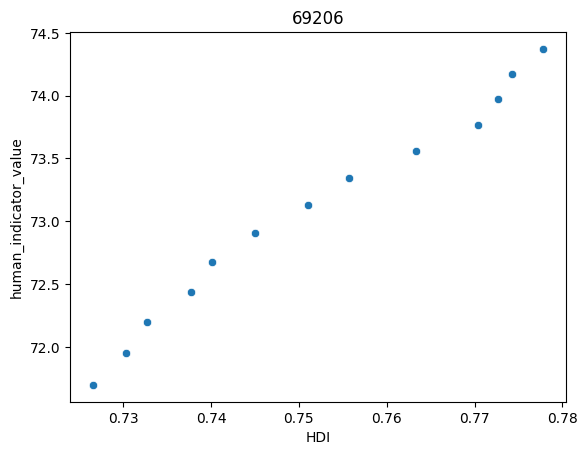

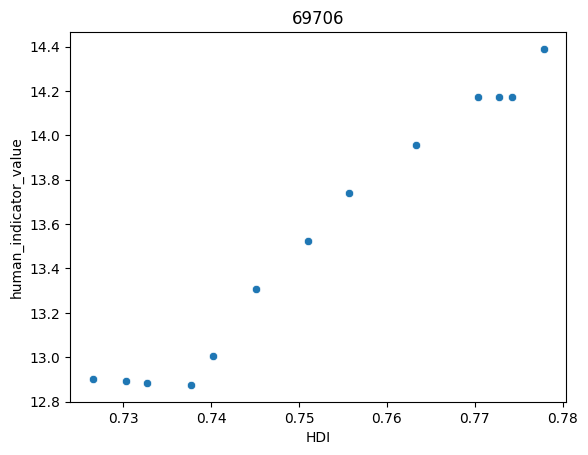

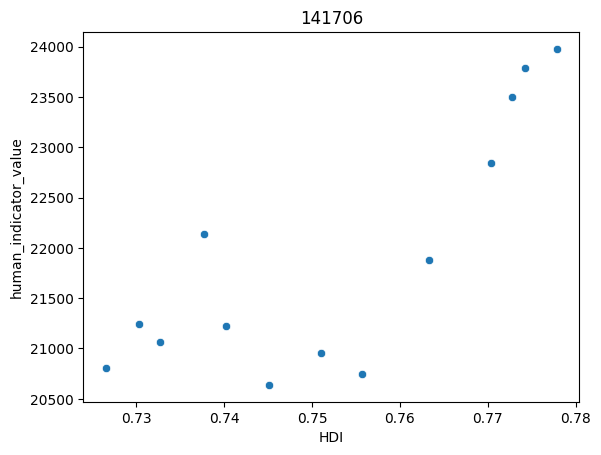

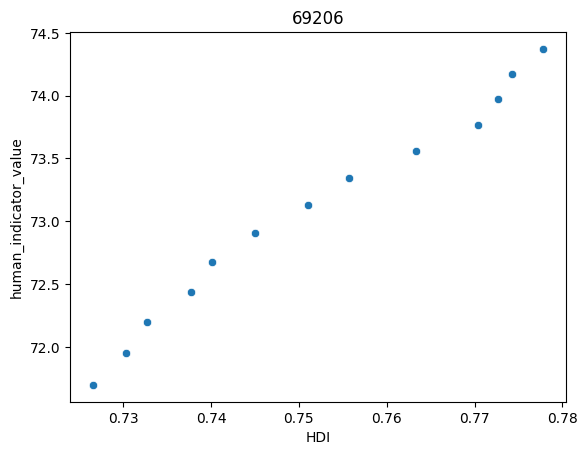

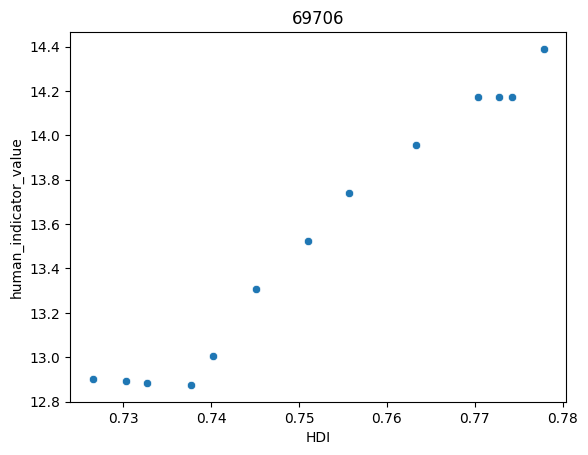

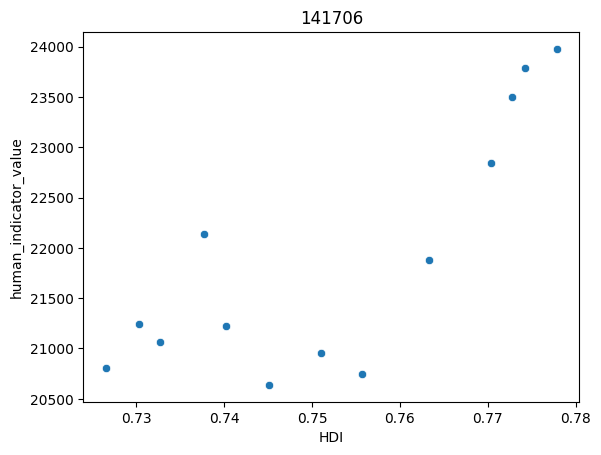

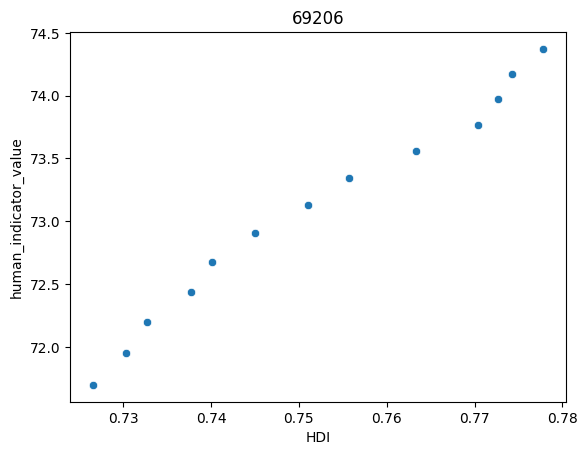

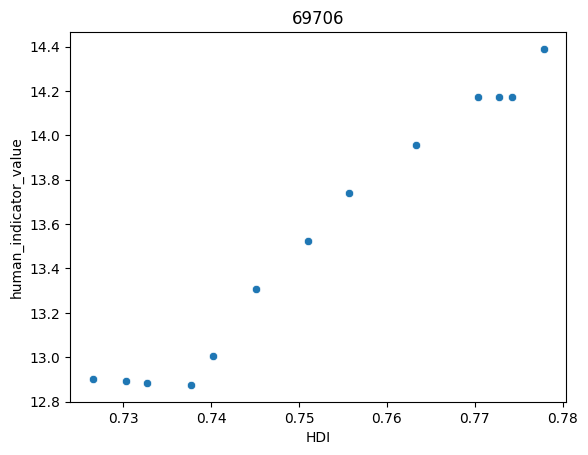

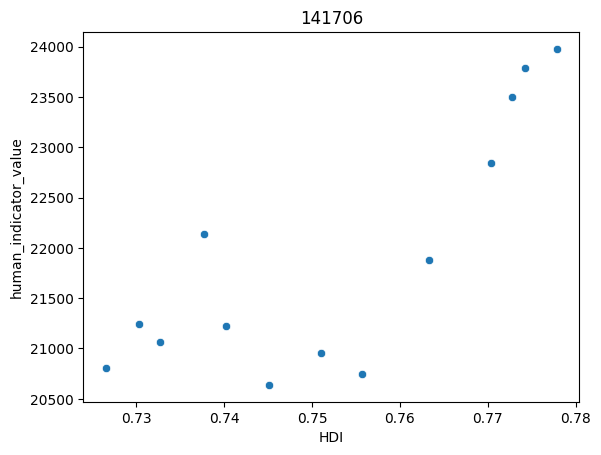

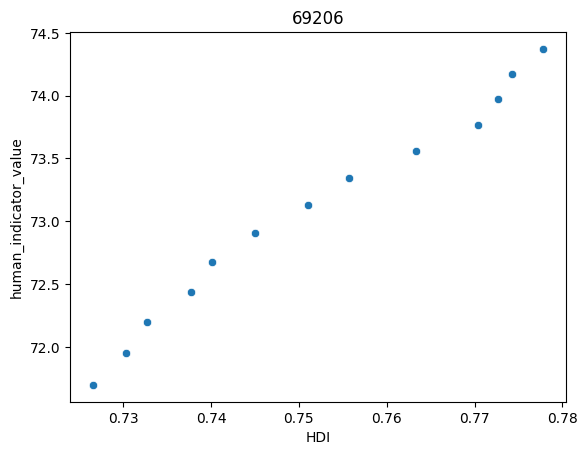

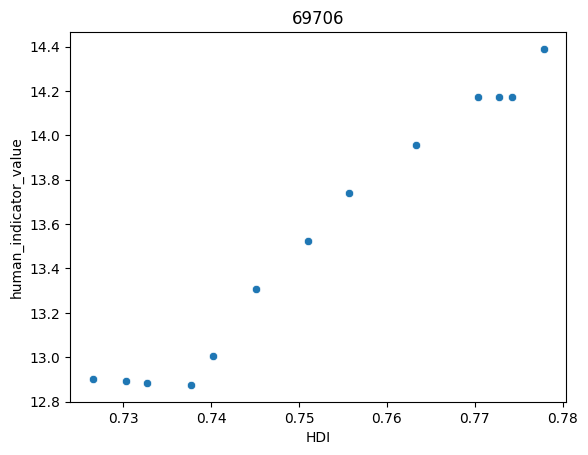

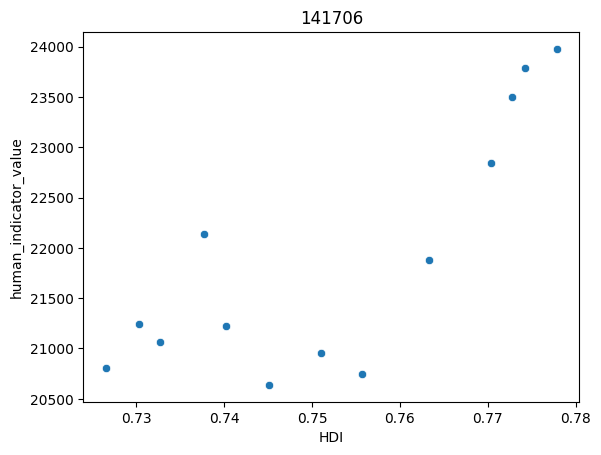

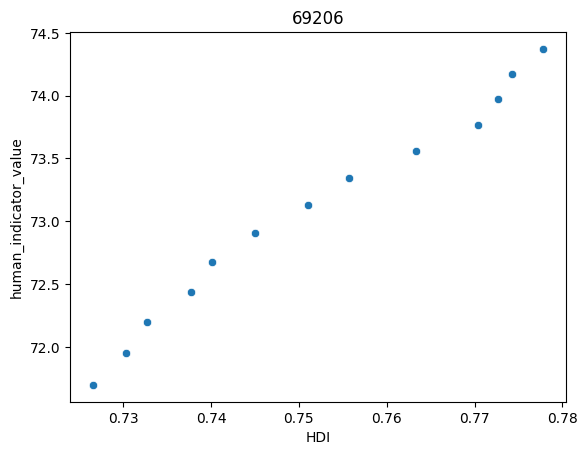

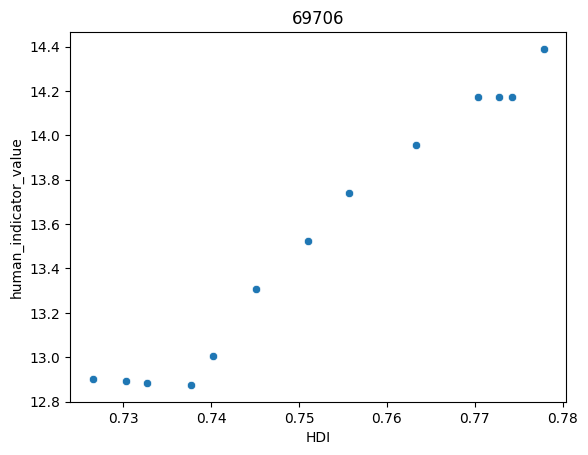

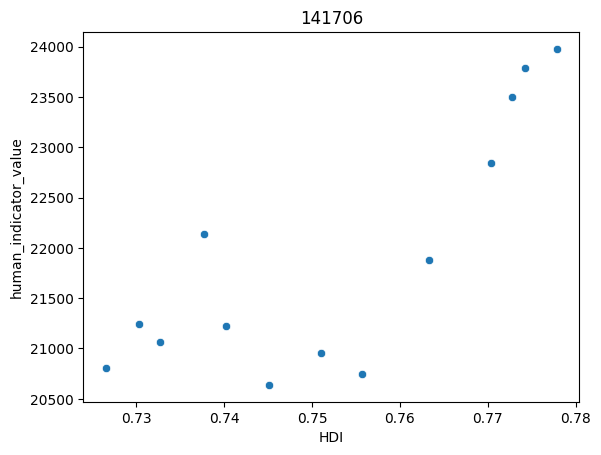

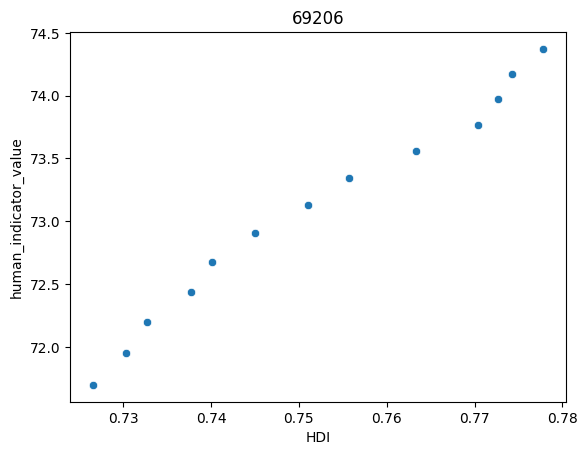

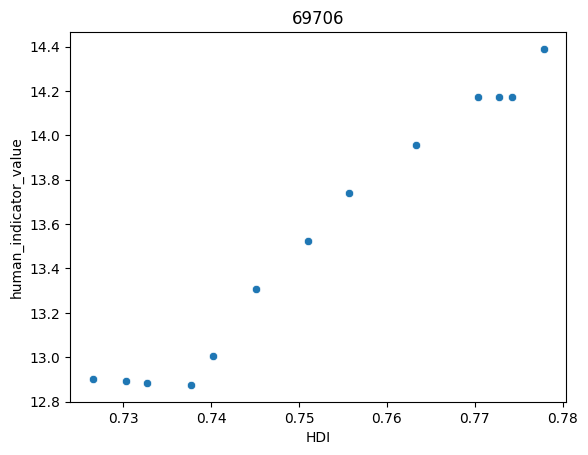

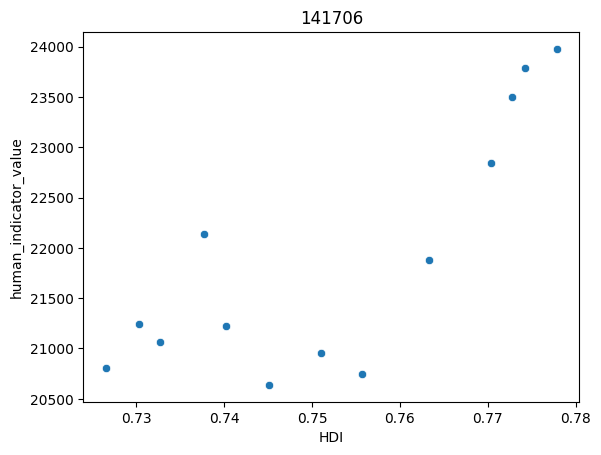

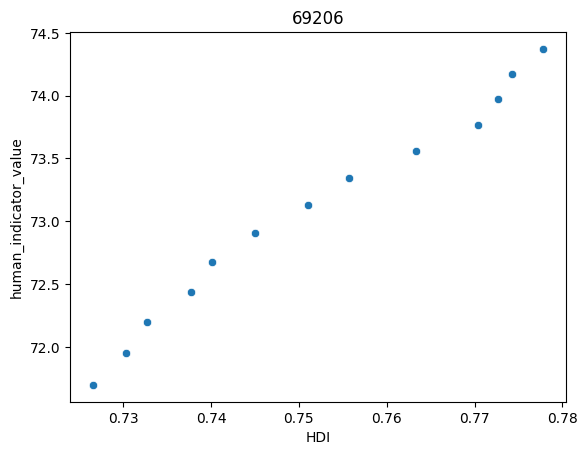

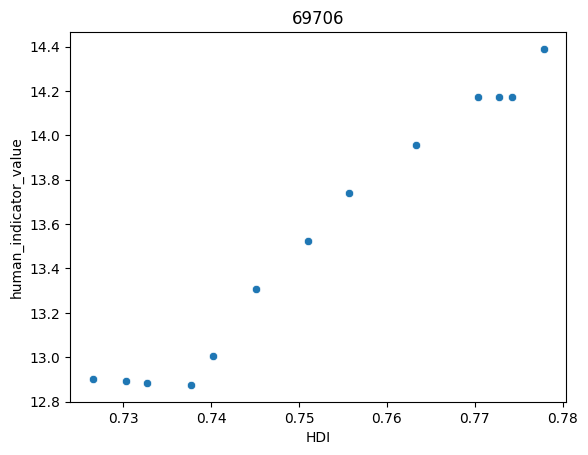

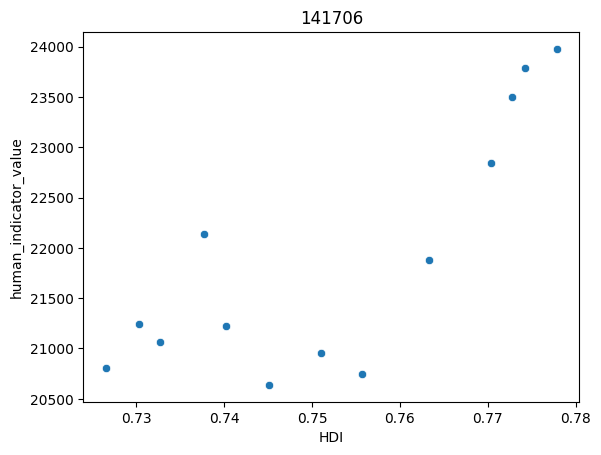

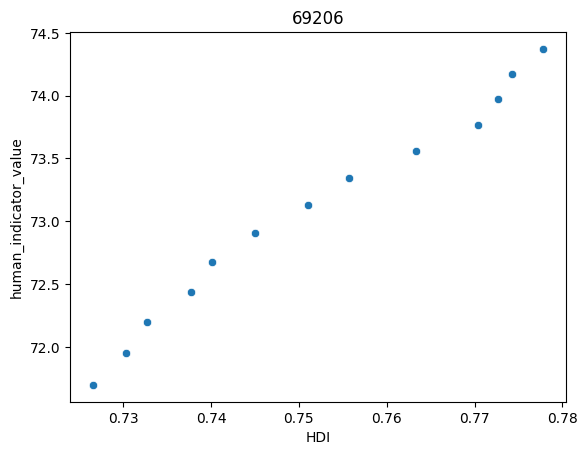

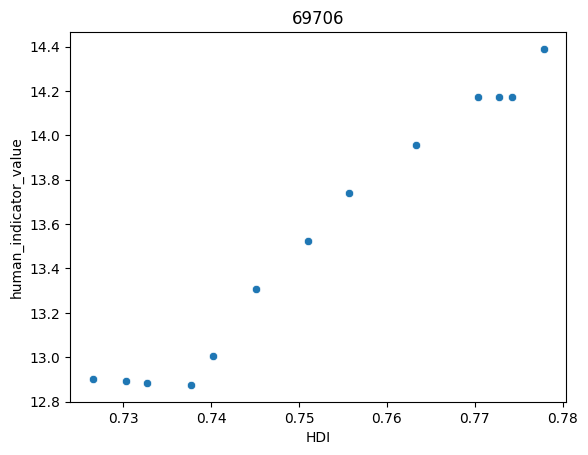

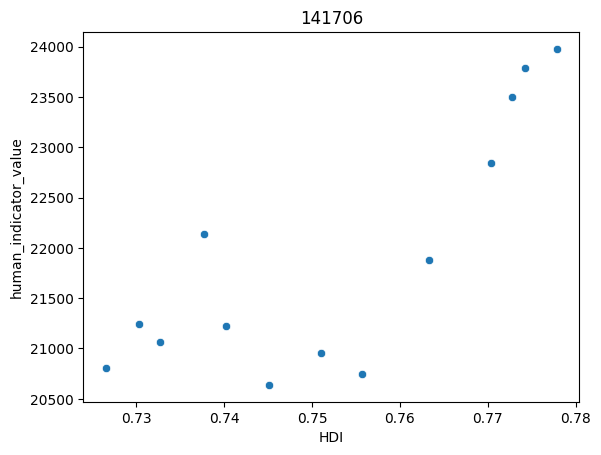

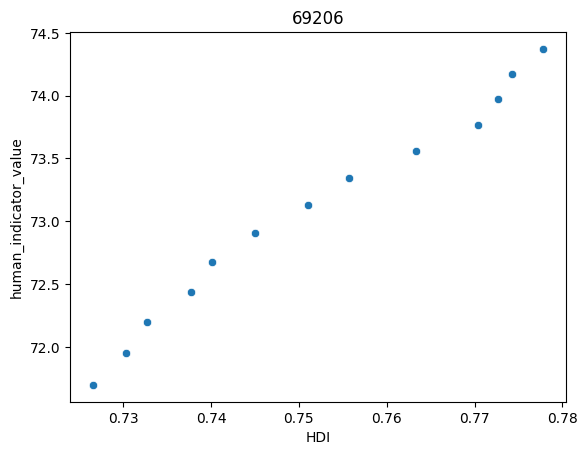

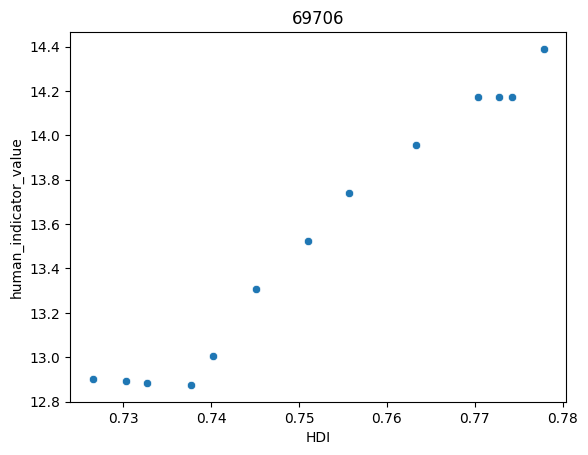

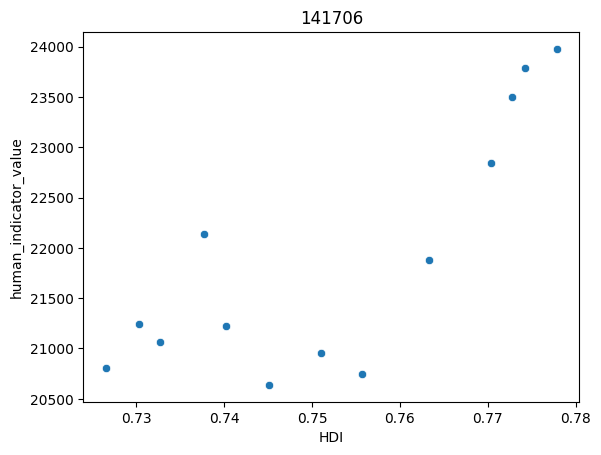

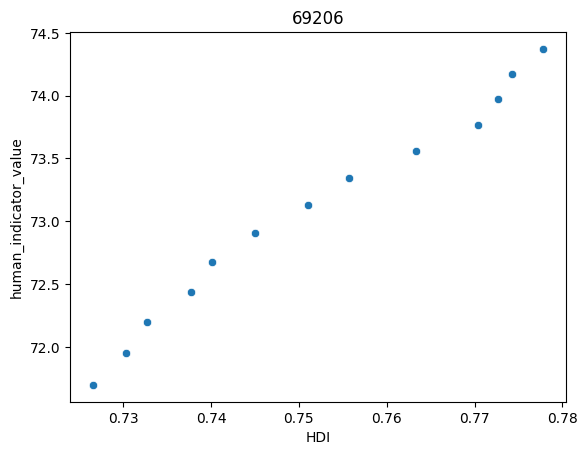

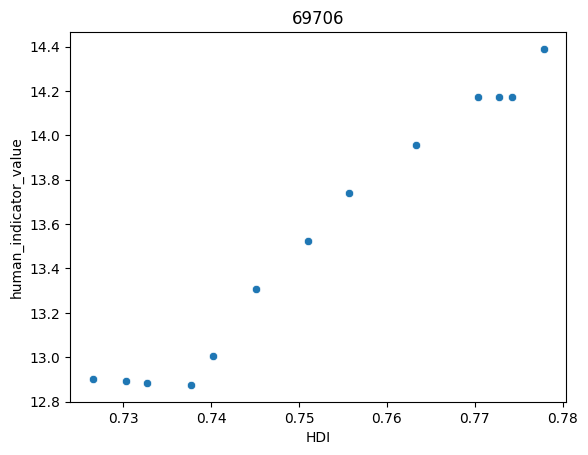

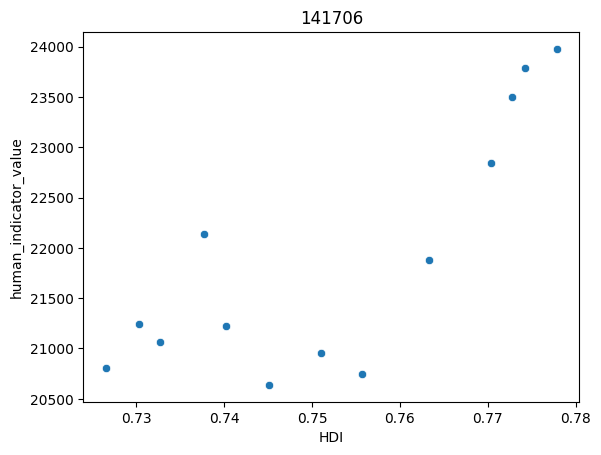

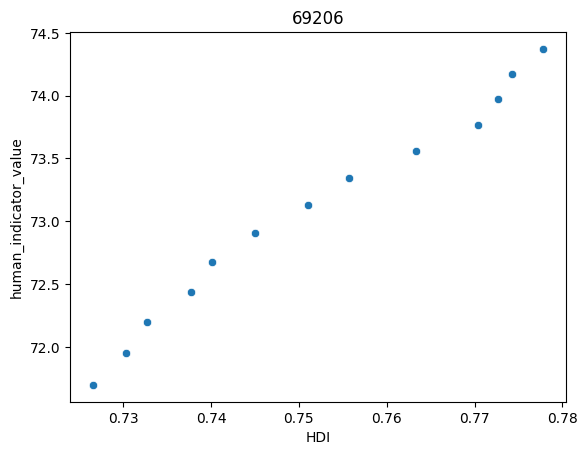

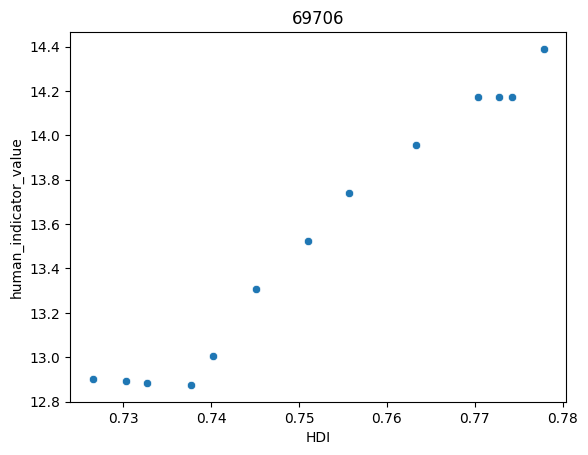

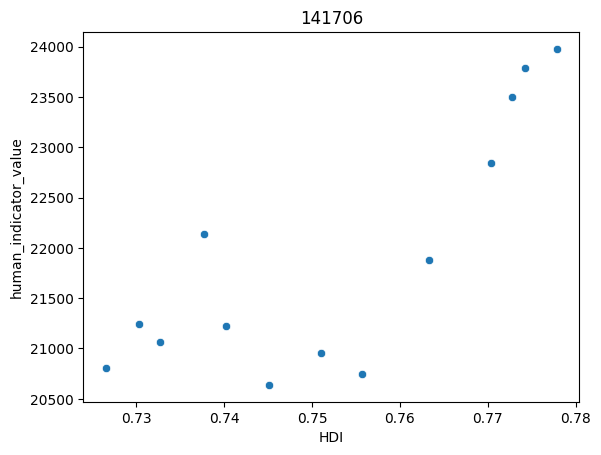

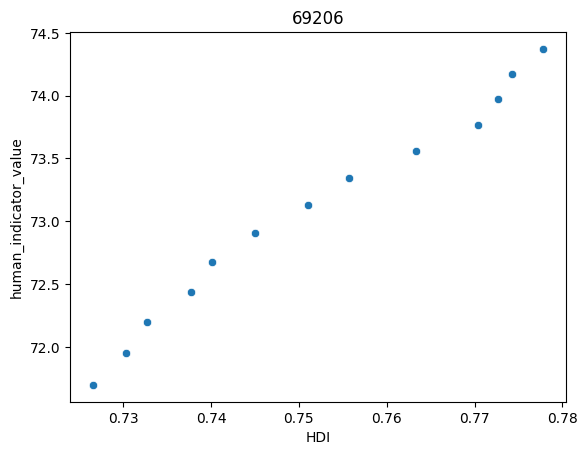

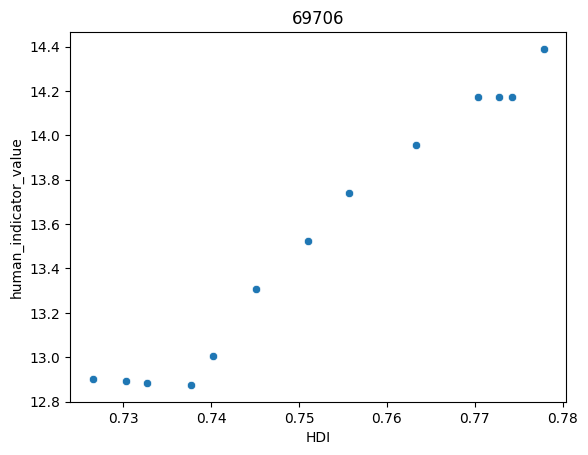

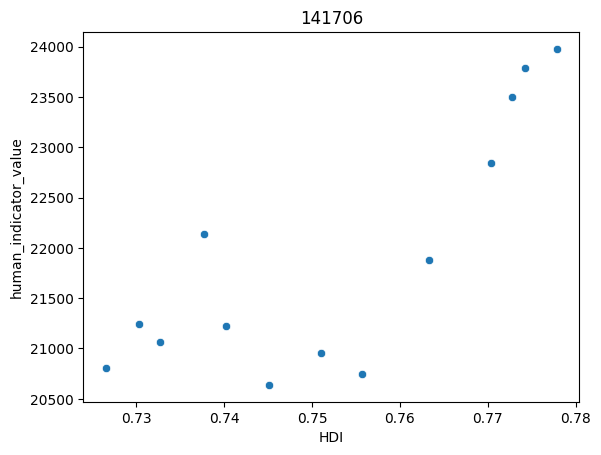

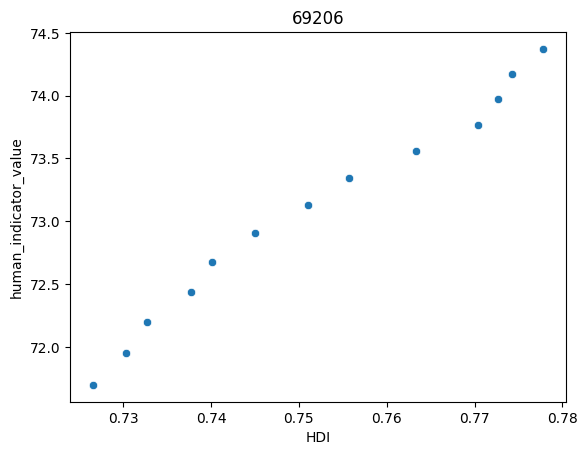

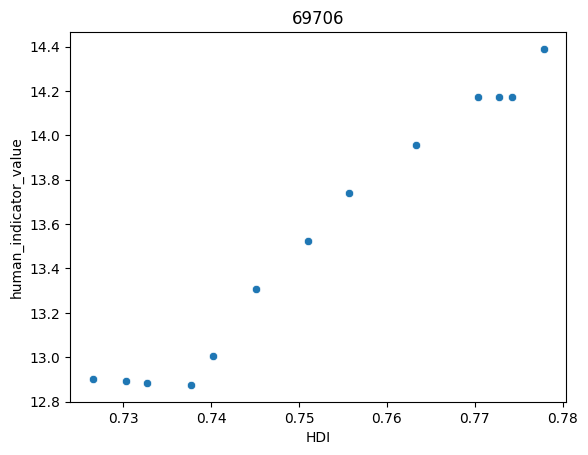

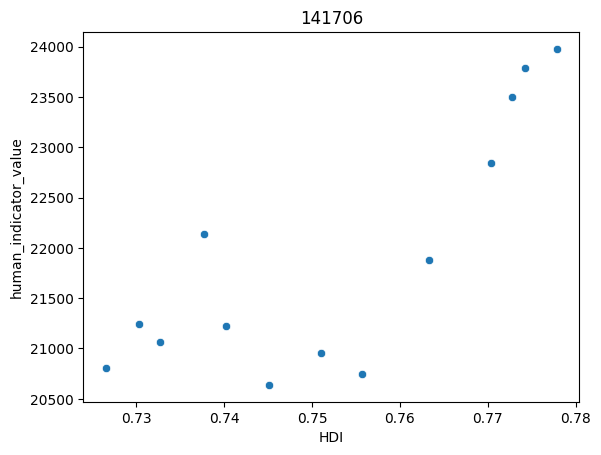

In [330]:
# Group the data by each variable in the 'human_indicator_code' column and calculate the mean HDI value for each group
HDI_by_variable = HumInd3.groupby('human_indicator_code')['HDI'].mean()

# Create a new DataFrame with the mean HDI values and the corresponding values for each variable
HumInd4 = pd.DataFrame({'HDI': HDI_by_variable, 'human_idicator_code': HDI_by_variable.index})

# Use Seaborn's scatterplot() function to create scatter plots for each variable
for var in HumInd3['human_indicator_code']:
    HumInd4 = HumInd3.loc[HumInd3['human_indicator_code'] == var]
    sns.scatterplot(x='HDI', y='human_indicator_value', data=HumInd4)
    plt.title(var)
    plt.show()

The results indicates that there is a strong linear relationship between the HDI and 69206 and HDI and 60706. howevere though there is a fairly strong relationship between HDI and 141706 it as not as strong as teh other two varaiables. lotted. It is important to note that this does not necessarily mean that there is a causal relationship between the variables, and other factors should also be considered when interpreting the results.

A causal relationship between two variables is demonstrated when there is evidence that changes in one variable directly cause changes in the other variable.

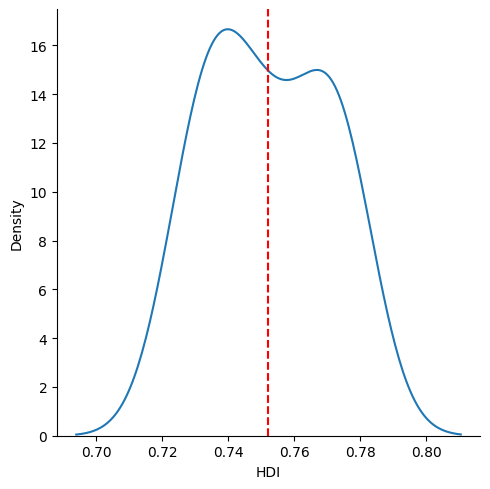

In [331]:
# Create a subset of the data with one of the variables
var_data = HumInd3.loc[HumInd3['human_indicator_name'] == 'life_expectancy_at_birth']

# Plot the distribution of the variable with a fitted kernel density estimate
sns.displot(var_data, x='HDI', kind='kde')

# Add a vertical line at the mean HDI value
plt.axvline(x=var_data['HDI'].mean(), color='red', linestyle='--')
plt.show()

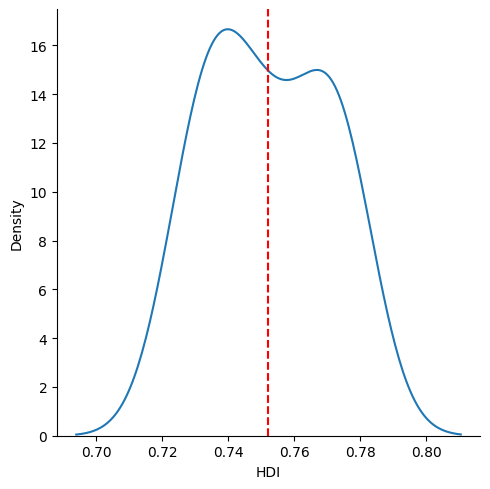

In [332]:
# Create a subset of the data with one of the variables
var_data1 = HumInd3.loc[HumInd3['human_indicator_name'] == 'expected_years_schooling']

# Plot the distribution of the variable with a fitted kernel density estimate
sns.displot(var_data1, x='HDI', kind='kde')

# Add a vertical line at the mean HDI value
plt.axvline(x=var_data1['HDI'].mean(), color='red', linestyle='--')
plt.show()

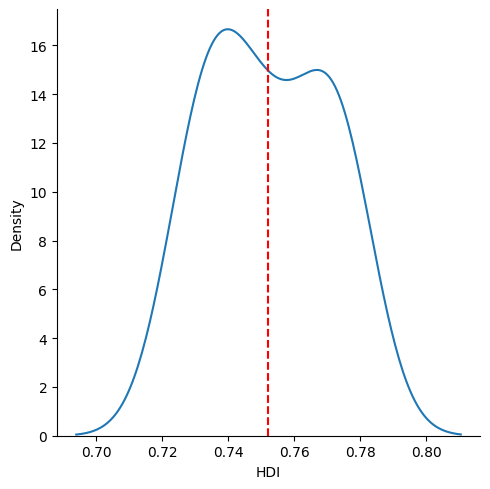

In [333]:
# Create a subset of the data with one of the variables
var_data2 = HumInd3.loc[HumInd3['human_indicator_name'] == 'gross_national_income_per_capita']

# Plot the distribution of the variable with a fitted kernel density estimate
sns.displot(var_data2, x='HDI', kind='kde')

# Add a vertical line at the mean HDI value
plt.axvline(x=var_data2['HDI'].mean(), color='red', linestyle='--')
plt.show()

The three ditribution plots shows an almnost bell-shape. This indicates that the data is approximately normally distributed. A normal distribution is a common probability distribution where data clusters around the mean, with fewer data points further away from the mean. If a dataset is normally distributed, it can be used to make statistical inferences and is often used in hypothesis testing and confidence intervals

Testing for Homoscedasticity

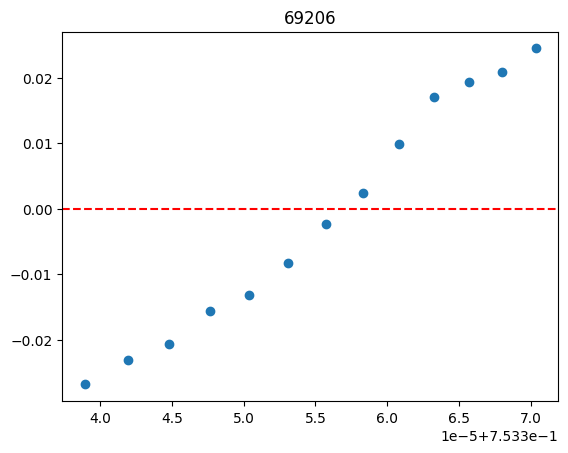

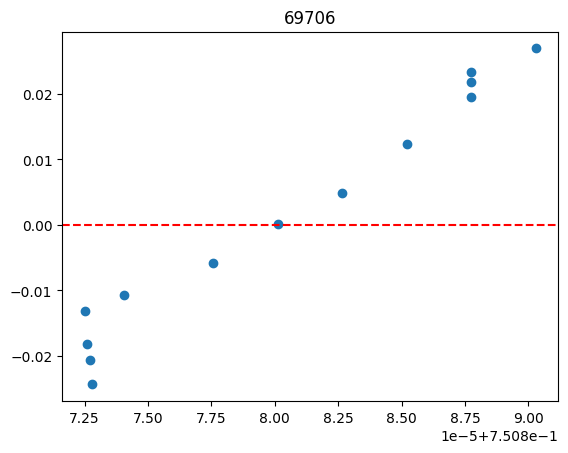

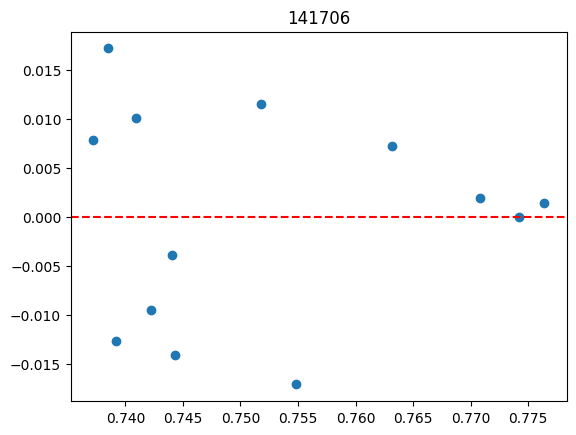

In [334]:
# Define the independent variables
X = HumInd3[['human_indicator_value', 'human_indicator_code']]

y = HumInd3['HDI']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit a multiple linear regression model
model = sm.OLS(y, X).fit()

# Calculate the residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Create scatter plots of the residuals versus the fitted values for each independent variable
for var in HumInd3['human_indicator_code'].unique():
    subset = HumInd3.loc[HumInd3['human_indicator_code'] == var]
    residuals_subset = residuals[subset.index]
    fitted_values_subset = fitted_values[subset.index]
    plt.scatter(fitted_values_subset, residuals_subset)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(var)
    plt.show()

This code creates scatter plots of the residuals versus the fitted values for each independent variable in the column human_indicator_name, after fitting a multiple linear regression model with HDI as the dependent variable and the variables in human_indicator_value and human_indicator_name as independent variables. It is used to visually test the assumption of homoscedasticity, which states that the variance of the residuals should be constant across all levels of the independent variables. A scatter plot that shows a random pattern of points around the horizontal axis with no obvious patterns, trends, or fanning out towards one side or the other, suggests that the assumption of homoscedasticity is met. On the other hand, a scatter plot that shows a funnel-like shape or a pattern of points with increasing or decreasing variance with increasing fitted values suggests heteroscedasticity, which can bias the estimates and affect the significance of the regression coefficients.

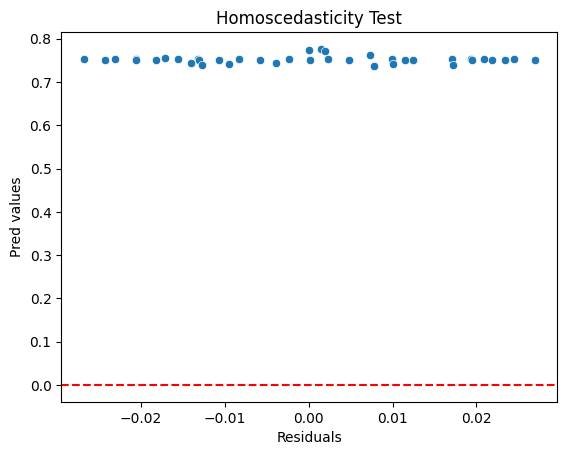

In [335]:
# Define the independent variables
X = HumInd3[['human_indicator_value', 'human_indicator_code']]

# Define the dependent variable
y = HumInd3['HDI']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit a multiple linear regression model
model = sm.OLS(y, X).fit()

# Calculate the residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Calculate the predicted values
pred_val = model.fittedvalues.copy()

# Calculate the true values
true_val = HumInd3['HDI'].values.copy()

# Calculate the residuals
residual = true_val - pred_val

# Plot the residuals versus the fitted values
sns.scatterplot(x=residual, y=pred_val)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Pred values')
plt.title('Homoscedasticity Test')
plt.show()

This code creates a scatter plot of the residuals versus the fitted values to test for homoscedasticity. The predicted values, true values, and residuals are calculated, and the plot shows if the variance of the residuals is constant across different levels of the predicted values. If the variance of the residuals is constant, then the data is homoscedastic. If the variance of the residuals changes as the predicted values increase, then the data is heteroscedastic.

If the variance of the residuals is constant across different levels of the predicted values, then the scatterplot of residuals versus fitted values would have an even spread of points around the horizontal line at 0 (the line of no residual). The points would be randomly scattered and not form any discernible pattern or trend. This indicates that the assumptions of homoscedasticity and linearity have been met, and the multiple linear regression model is a good fit for the data.


the data points are in a straight line away from the line of no residual (the horizontal line in this case), this could indicate heteroscedasticity, which means the variance of the residuals is not constant across different levels of the predicted values.

If the data points form a straight horizontal line at the top, this could indicate a ceiling effect where the dependent variable (in this case, HDI) is limited by an upper boundary, leading to a clustering of data points near the upper limit.

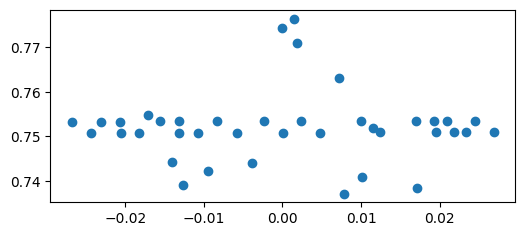

In [336]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

this plot shows some heteroscedasticity - look at how splayed out the dots are, when they should be random and you should be able to draw basically a flat horizontal line across.

Double check the graph with statistics. 

Breusch Pagan

In [337]:
import statsmodels.stats.diagnostic as sms

In [338]:
# Perform the Breusch-Pagan test
test_results = sms.het_breuschpagan(residual, X)
# Print the p-value
print("Breusch-Pagan test results:")
print("LM statistic: {:.4f}".format(test_results[0]))
print("p-value: {:.4f}".format(test_results[1]))
print("f-value: {:.4f}".format(test_results[2]))
print("f p-value: {:.4f}".format(test_results[3]))

Breusch-Pagan test results:
LM statistic: 8.0703
p-value: 0.0177
f-value: 4.6967
f p-value: 0.0154


The f-value and f p-value are used to test the null hypothesis that the variance of the errors is constant. A low p-value suggests that the null hypothesis can be rejected, indicating that there is evidence of heteroscedasticity (i.e., non-constant variance).

In this case, the f-value is 4.6967 and the f p-value is 0.0154, which is less than the commonly used threshold of 0.05. Therefore, we can conclude that there is evidence of heteroscedasticity in the model, which means that the variance of the errors is not constant across different levels of the predicted values. This violates one of the assumptions of linear regression, which assumes that the variance of the errors is constant.

Harvey Collier Test

The Harvey-Collier test is a statistical test used to detect outliers in linear regression models. Specifically, it tests whether there are influential observations that are having a disproportionate impact on the estimated coefficients of the regression model.

The test is based on the idea that the leverage of an observation (i.e., its influence on the fitted values) and its residual (i.e., the difference between its actual value and the predicted value) can be used to identify potential outliers. If an observation has both high leverage and a large residual, it may be exerting a disproportionate influence on the regression model.

In [339]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-8.624052478861636, pvalue=3.5104090349539146e-10)

The t-test result shows a statistic of -8.62 and a p-value of 3.51e-10.

The statistic indicates the number of standard deviations the sample mean is from the null hypothesis. In this case, the negative value indicates that the sample mean is lower than the null hypothesis. The larger the absolute value of the statistic, the more evidence there is against the null hypothesis.

The p-value is the probability of observing a test statistic as extreme as the one calculated from the sample data, assuming the null hypothesis is true. In this case, the extremely low p-value indicates strong evidence against the null hypothesis. Generally, if the p-value is less than 0.05, the null hypothesis is rejected in favor of the alternative hypothesis. This means you have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic.

In summary, the results suggest that there is strong evidence to reject the null hypothesis in favor of the alternative hypothesis, indicating that there is a significant difference between the sample mean and the hypothesized population mean.

Again the assumption has been violated. No surprise there. 

Attempt to transform the variables

Use Box-Cox transformation to transform the variables. 

The Box-Cox transformation is a power transformation method that can be used to normalize data. It is based on the idea of finding a suitable exponent to raise each data point to in order to achieve the desired normalization. The Box-Cox transformation is available in the SciPy library in Python.

In [343]:
transformed,_=boxcox(HumInd3['human_indicator_code'])

(array([26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13.]),
 array([0.33226307, 0.33226307, 0.33226307, 0.33226307, 0.33226307,
        0.33226307, 0.33226307, 0.33226307, 0.33226307, 0.33226307,
        0.33226307]),
 <BarContainer object of 10 artists>)

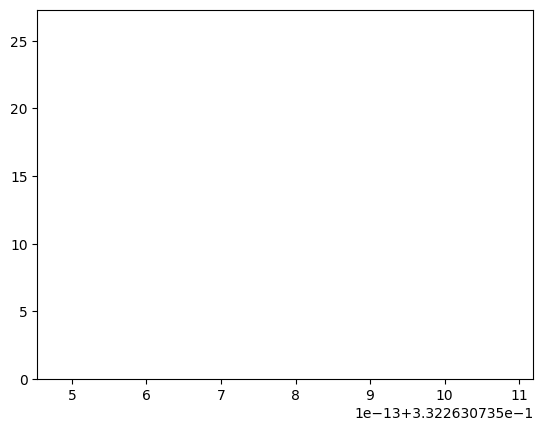

In [344]:
plt.hist(transformed)